In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import sys

import os

import matplotlib.pyplot as plt 
import japanize_matplotlib
import seaborn as sns

In [3]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
weather = pd.read_csv('../weather.csv')
alldata = pd.concat([train.copy(), test.copy()], axis = 0)

In [4]:
#データ件数
trainSuv = alldata[:len(train)]
testSuv = alldata[len(train):]
print(len(trainSuv), len(testSuv))

69104 220


# weather確認

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218112 entries, 0 to 218111
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           218112 non-null  int64  
 1   mean_temp      217745 non-null  float64
 2   max_temp       217745 non-null  float64
 3   max_temp_time  217745 non-null  object 
 4   min_temp       217744 non-null  float64
 5   min_temp_time  217744 non-null  object 
 6   sum_rain       217732 non-null  float64
 7   sun_time       217680 non-null  float64
 8   mean_humid     217708 non-null  float64
 9   area           218112 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 16.6+ MB


In [6]:
for clm in weather.columns:
    print(
        '{}\r\nnull件数：{}, ユニークデータ数：{}'.format(
            clm, 
            weather[clm].isnull().sum(), 
            len(weather[clm].unique())))

date
null件数：0, ユニークデータ数：6811
mean_temp
null件数：367, ユニークデータ数：482
max_temp
null件数：367, ユニークデータ数：488
max_temp_time
null件数：367, ユニークデータ数：206818
min_temp
null件数：368, ユニークデータ数：523
min_temp_time
null件数：368, ユニークデータ数：191557
sum_rain
null件数：380, ユニークデータ数：439
sun_time
null件数：432, ユニークデータ数：148
mean_humid
null件数：404, ユニークデータ数：85
area
null件数：0, ユニークデータ数：32


In [8]:
def func(row):
    return(int(str(row['date'])[:4]),int(str(row['date'])[4:6]),int(str(row['date'])[6:8]))

weather[['year', 'month', 'day']] = weather.apply(func, axis=1, result_type="expand")

# 作業

In [16]:
df = weather.copy()

def func(row):
    if row['sum_rain'] == 0:
        return 1
    else:
        return 0
df['isNoRain'] = df.apply(func, axis=1)

def func2(row):
    if row['sun_time'] >= 6 :
        return 1
    else:
        return 0
df['isOver6TimeSunset'] = df.apply(func2, axis=1)

def func3(row):
    if row['sun_time'] >= 4 :
        return 1
    else:
        return 0
df['isOver4TimeSunset'] = df.apply(func3, axis=1)

def func4(row):
    if row['sun_time'] >= 2 :
        return 1
    else:
        return 0
df['isOver2TimeSunset'] = df.apply(func4, axis=1)

In [19]:
df.groupby(['area', 'year', 'month'])[['isNoRain','isOver6TimeSunset','isOver4TimeSunset','isOver2TimeSunset']].sum()

isNoRain  isOver6TimeSunset  isOver4TimeSunset  \
area year month                                                   
仙台   2004 11           21                 10                 15   
          12           26                 11                 17   
     2005 1            22                  9                 14   
          2            17                 10                 14   
          3            19                 17                 20   
...                   ...                ...                ...   
鹿児島  2023 2            19                 11                 16   
          3            17                 17                 19   
          4            18                 13                 17   
          5            22                 19                 21   
          6            12                  9                 11   

                 isOver2TimeSunset  
area year month                     
仙台   2004 11                    15  
          12                    24  
     2005 1                     24  
          2                     21  
          3                     24  
...                            ...  
鹿児島  2023 2                     17  
          3                     21  
          4                     20  
          5                     24  
          6                     13  

[7168 rows x 4 columns]

# 日照時間と雨量の統計

In [20]:
weather['sum_rain'].describe()

count    217732.000000
mean          4.435905
std          13.590087
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         429.500000
Name: sum_rain, dtype: float64

area


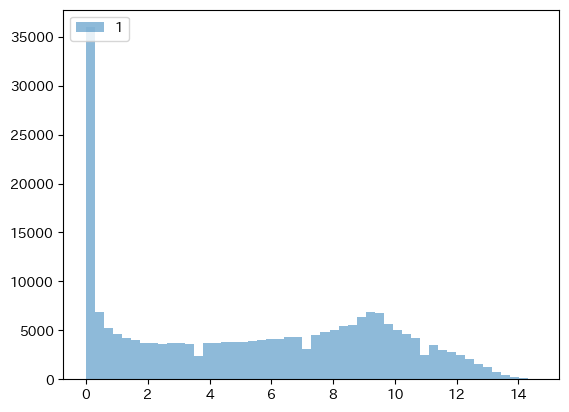

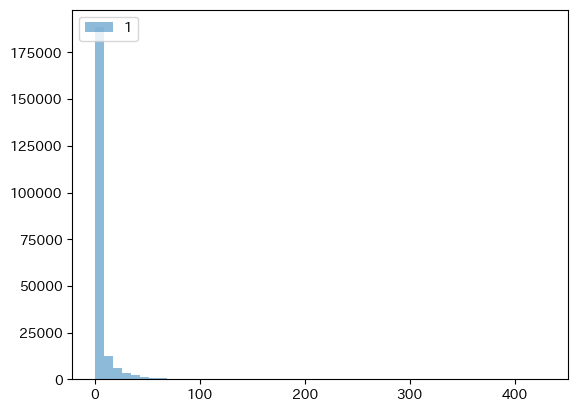

In [11]:

import numpy as np
import matplotlib.pyplot as plt

idx = 1
print(clm)
#
plt.hist(weather['sun_time'], alpha = 0.5, label='1', bins=50)
plt.legend(loc='upper left')
plt.show()

plt.hist(weather['sum_rain'], alpha = 0.5, label='1', bins=50)
plt.legend(loc='upper left')
plt.show()